好坏质检分类实战task:
l、基于data_class_raw.csv数据，根据高斯分布概率密度函数，寻找异常点并剔除
2、基于data_class_processed.csv数据，进行PCA处理，确定重要数据维度及成分
3、
完成数据分离，数据分离参数：random_state=4,test_size=0.4
4、建立KNN模型完成分类，n_neighbors取10，计算分类准确率，可视化分类边界
5、计算测试数据集对应的混淆矩阵，计算准确率、召回率、特异度、精确率、F1分数
6、尝试不同的n_neighbors(1-20),计算其在训练数据集、测试数据集上的准确率并作图

In [78]:
import numpy as np
import pandas as pd
data_raw = pd.read_csv('./AIlearning/data_class_raw.csv')

In [79]:
data_raw.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [80]:
#define x and y
x = data_raw.drop(['y'],axis = 1)
y = data_raw.loc[:,'y']

In [81]:
y.value_counts()

0    19
1    17
Name: y, dtype: int64

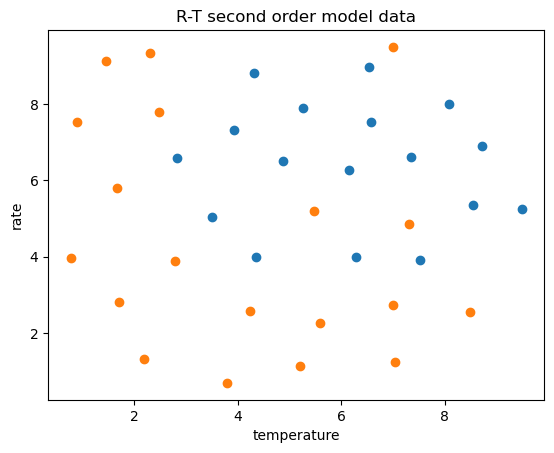

In [82]:
from matplotlib import pyplot as plt
fig0 = plt.Figure(figsize=(5,5))
good = plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],marker='o')
bad = plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],marker='o')
plt.title('R-T second order model data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [83]:
#异常检测并且剔除
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination = 0.02)
ad_model.fit(x[y==0])
y_predict_bad = ad_model.predict(x[y==0])
print(y_predict_bad)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


In [84]:
ad_model.fit(x[y==1])
y_predict_good = ad_model.predict(x[y==1])
print(y_predict_good)

[ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


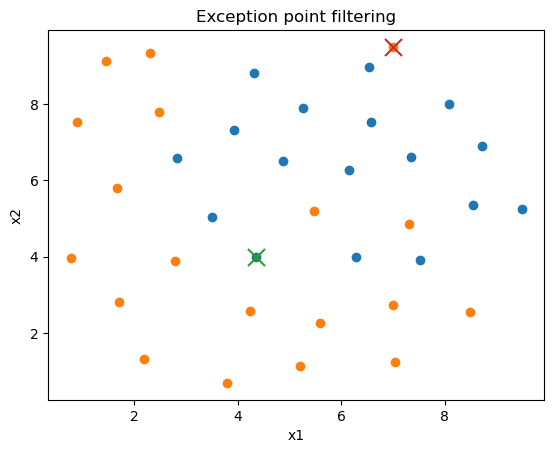

In [85]:
fig2 = plt.Figure(figsize=(5,5))
good = plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],marker='o')
bad = plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],marker='o')
plt.scatter(x.loc[:,'x1'][y==1][y_predict_good == -1],x.loc[:,'x2'][y==1][y_predict_good == -1],marker='x',s=150)
plt.scatter(x.loc[:,'x1'][y==0][y_predict_bad == -1],x.loc[:,'x2'][y==0][y_predict_bad == -1],marker='x',s=150)
plt.title('Exception point filtering')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [86]:
data_process = pd.read_csv('./AIlearning/data_class_processed.csv')
#define x and y
x = data_process.drop(['y'],axis = 1)
y = data_process.loc[:,'y']

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_norm = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.5369408 0.4630592]


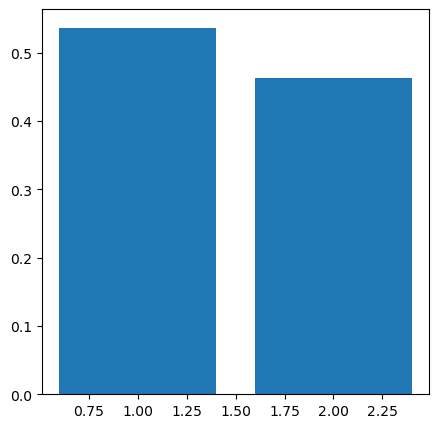

In [88]:
fig3 = plt.figure(figsize=(5,5))
plt.bar([1,2],var_ratio)
plt.show()

In [89]:
#train and test split: 训练和测试数据分离 #random_state 是种子数据，相同数字分类出的随机数据相同，shuffle默认为True随机分，若是F则不随机
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test= train_test_split(x,y,random_state=4,test_size=0.4)
print(x_train.shape,x_test.shape,x.shape)

(21, 2) (14, 2) (35, 2)


In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(x_train,y_train)
y_train_predict = knn_10.predict(x_train).reshape(-1,1)
y_test_predict = knn_10.predict(x_test).reshape(-1,1)
# #计算准确度 calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(f'train data accuracy:{accuracy_train},test data accuracy:{accuracy_test}')

train data accuracy:0.9047619047619048,test data accuracy:0.6428571428571429


c:\Users\xlcg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\xlcg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [91]:
#画出knn模型的结果和边界,生成一个0到10间隔为0.05的两个方阵，上面报错是np的数组维度变低了，用reshape改回来就行
xx, yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range.shape)

(40000, 2)


In [92]:
y_range_predict= knn_10.predict(x_range)

c:\Users\xlcg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\xlcg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


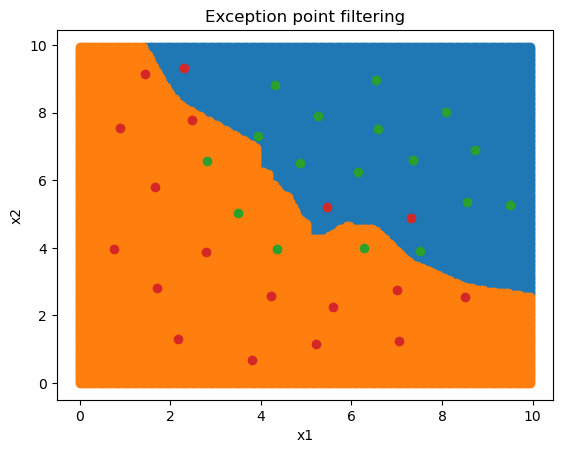

In [93]:
fig2 = plt.Figure(figsize=(5,5))
knn_good = plt.scatter(x_range[:,0][y_range_predict==1],x_range[:,1][y_range_predict==1],marker='o')
knn_bad = plt.scatter(x_range[:,0][y_range_predict==0],x_range[:,1][y_range_predict==0],marker='o')
plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],marker='o')
plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],marker='o')
plt.title('Exception point filtering')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [94]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test,y_test_predict)
print(c_matrix)

[[4 2]
 [3 5]]


In [95]:
#混淆矩阵测算模型水平
TP = c_matrix[1,1]
TN = c_matrix[0,0]
FP = c_matrix[0,1]
FN = c_matrix[1,0]
print(TP,TN,FP,FN)

5 4 2 3


In [96]:
#准确率：整体样本中，预测正确样本数的比例.Accuracy =(TP+TN)/(TP+TN+FP+FN)
#灵敏度（召回率）：正样本中，预测正确的比例Sensitivity Recall TP/(TP+FN)
#特异度：负样本中，预测正确的比例Specificitv TN/(TN+FP)
#精确率：预测结果为正的样本中，预测正确的比例Precision TP/(TP+FP)
#F1分数：综合Precision和Recalll的一个判断指标F1 Score  2*Precision X sensitivity/(Precision+sensitivity)
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)
f1 =2*precision*sensitivity/(sensitivity+precision)
print(accuracy,sensitivity,specificity,precision,f1)

0.6428571428571429 0.625 0.6666666666666666 0.7142857142857143 0.6666666666666666


In [97]:
#尝试一下n_neighbors的各种取值
accuracy_train = []
accuracy_test = []
n_neighbor =  []
for i in range(1,21):
    knn_test = KNeighborsClassifier(n_neighbors = i)
    knn_test.fit(x_train,y_train)
    y_train_test = knn_test.predict(x_train)
    y_test_test = knn_test.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_train_test))
    accuracy_test.append(accuracy_score(y_test,y_test_test))
    n_neighbor.append(i)
print(accuracy_train)
print(accuracy_test)

#报错不影响结果，需要不报错可以打开KNeighborsClassifier的源码，搜索
#mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
#在里面加上“, keepdims=True”

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714]
[0.5714285714285714, 0.5, 0.5, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


c:\Users\xlcg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\xlcg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

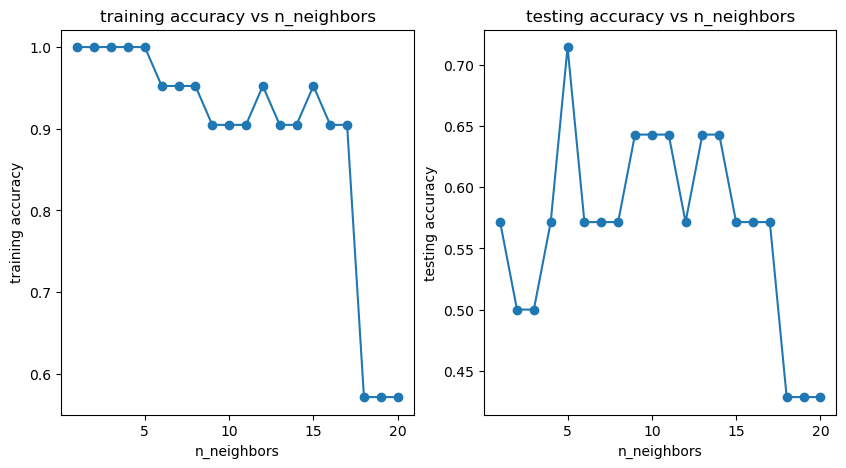

In [98]:
fig4 = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(n_neighbor,accuracy_train,marker='o')
plt.title('training accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('training accuracy')
plt.subplot(122)
plt.plot(n_neighbor,accuracy_test,marker='o')
plt.title('testing accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('testing accuracy')
plt.show()